### Assignment 17 - Support Vector Machine

#### 2nd Problem Statement

Prepare a classification model using SVM for salary data 

In [ ]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn import preprocessing

#library for model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

#Martix library
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# loading dataset
dataset = pd.read_csv('C:/Users/Akaash/Downloads/SalaryData_Train.csv')
dataset.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
#Checking the Dataset for Na Values & Dtypes of Column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


Inference: There are No NA Values Present,  Also Datasets Has X as well as the Y Variable Categorial, So for Y variable Using Label Encoder then for X Variable will Use Dummies

In [ ]:
#Complete SalaryData dataset - applying lable encoder to size_category column - (Y Variable is Categorial)
label_encoder = preprocessing.LabelEncoder()
dataset['Salary'] = label_encoder.fit_transform(dataset['Salary']) 
dataset.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


Inference: Label Encoder is Applied on Y Variable So 0 = "<=50" Class , 1 = ">50" Class

In [ ]:
#Dummies for X Variable
dataset = pd.get_dummies(dataset)
dataset.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,...,native_ Cambodia,native_ Canada,native_ China,native_ Columbia,native_ Cuba,native_ Dominican-Republic,native_ Ecuador,native_ El-Salvador,native_ England,native_ France,native_ Germany,native_ Greece,native_ Guatemala,native_ Haiti,native_ Honduras,native_ Hong,native_ Hungary,native_ India,native_ Iran,native_ Ireland,native_ Italy,native_ Jamaica,native_ Japan,native_ Laos,native_ Mexico,native_ Nicaragua,native_ Outlying-US(Guam-USVI-etc),native_ Peru,native_ Philippines,native_ Poland,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Inference: Now the Dataset is Complete, Lets Separate X & Y Variable 

In [ ]:
# Dividing our data into X and Y variables 
X = pd.concat([dataset.iloc[:,0:5],dataset.iloc[:,6:]],axis = 1)
Y = dataset.iloc[:,5]

Inference: There are 102 Input Variable / Dimension, Now will Use PCA to reduce Dimension

**PCA - To Reduce Dimension**

In [ ]:
# Using MinMax Scaler to Scale Down the Scaling Effect
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
train_scaler = pd.DataFrame(trans.fit_transform(X))

In [ ]:
from sklearn.decomposition import PCA
#Creating PCA() instance, n_components = 102 --> Creating 102 PC's. --> As There are 102 Dimension in the X 
#(It is not necessary to give n_components as pca will create itself based on the dimension present)
pca_train = PCA(n_components = 102)
pca_train_values = pca_train.fit_transform(train_scaler)
# The amount of variance that each PCA explains is 
var = pca_train.explained_variance_ratio_
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([19.42, 27.36, 34.3 , 40.13, 45.  , 49.69, 53.89, 57.2 , 60.27,
       62.99, 65.66, 68.19, 70.45, 72.53, 74.44, 76.26, 77.9 , 79.45,
       80.74, 81.95, 83.09, 84.15, 85.19, 86.17, 87.08, 87.91, 88.71,
       89.49, 90.23, 90.97, 91.68, 92.38, 93.04, 93.64, 94.12, 94.56,
       94.97, 95.37, 95.73, 96.06, 96.37, 96.67, 96.96, 97.24, 97.49,
       97.69, 97.88, 98.06, 98.19, 98.31, 98.42, 98.53, 98.62, 98.7 ,
       98.78, 98.85, 98.92, 98.99, 99.06, 99.12, 99.17, 99.22, 99.27,
       99.32, 99.37, 99.41, 99.45, 99.49, 99.53, 99.57, 99.6 , 99.63,
       99.66, 99.68, 99.7 , 99.72, 99.74, 99.76, 99.78, 99.8 , 99.82,
       99.83, 99.84, 99.85, 99.86, 99.87, 99.88, 99.89, 99.9 , 99.91,
       99.92, 99.93, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94,
       99.94, 99.94, 99.94])

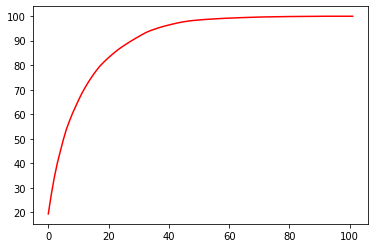

In [ ]:
# Variance plot for PCA components obtained 
import matplotlib.pyplot as plt
plt.plot(var1,color="red")

Inference: From the Above Plot We can Visualize Around 98 % Cumulative Variance is there with First 55 PCA so will Consider Them for My SVM Model

In [ ]:
#Final_X
Final_X = pd.concat([pd.DataFrame(pca_train_values[:,0:55])])
Final_X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,0.511884,-0.570399,0.985410,0.869147,0.301768,-0.160966,-0.069890,-0.248351,0.292375,-0.204779,-0.904007,0.077747,0.637117,-0.287869,-0.256156,-0.115223,0.054774,-0.071430,-0.186325,-0.357408,0.553539,-0.071704,-0.102062,-0.257893,0.300682,-0.407225,0.079428,0.170541,-0.124316,-0.032928,-0.119882,-0.042538,-0.083553,0.002422,0.041473,-0.099544,0.109199,-0.035643,-0.001017,0.037714,-0.037616,0.030888,-0.009637,0.023509,0.032497,-0.008378,-0.012893,0.010010,0.008061,0.004295,0.014317,0.015333,-0.000631,-0.001181,-0.004057
1,-1.186474,0.389451,0.805358,0.407706,0.380658,-0.302254,-0.106618,0.209061,0.920905,-0.145158,0.135624,0.361470,0.097292,-0.088496,-0.034929,0.092712,-0.566645,-0.090504,0.000872,0.113623,-0.262536,0.034858,0.000791,-0.060241,0.046269,-0.084845,0.057389,0.094760,0.171071,-0.106453,-0.077707,-0.039914,-0.077839,0.110073,0.018750,-0.003875,-0.062239,-0.068616,0.066676,0.054721,-0.031810,0.040729,0.169355,0.027562,-0.279358,-0.006266,-0.023825,0.011086,0.001754,0.004931,-0.021888,-0.002451,0.000348,0.001188,-0.000267
2,0.327319,-0.448965,-0.614483,1.019098,-0.704198,0.351374,0.014607,0.297586,0.005990,0.073360,-0.067686,-0.410153,0.032373,-0.125615,0.394672,0.162516,-0.023693,0.065716,0.342667,-0.082125,0.037271,0.156367,0.728052,-0.215497,0.226710,0.200902,-0.026090,0.076305,0.022612,-0.189716,-0.178580,0.001265,-0.025040,-0.061279,-0.009576,-0.041349,0.020877,0.004001,-0.023350,-0.014385,-0.023459,-0.013262,0.007118,-0.008797,-0.031967,-0.002822,-0.007099,0.012725,0.000795,0.000232,-0.003413,-0.002450,-0.001952,0.002057,0.001113
3,-0.872767,-0.017105,-0.213117,-0.454347,0.086417,0.047109,1.242660,-0.134197,-0.038709,0.072120,-0.014165,-0.132682,-0.090694,-0.148462,0.242219,-0.632580,-0.178655,0.156845,0.317185,0.115738,0.090321,0.431073,0.796471,-0.500316,-0.062773,0.123212,-0.008842,0.393720,0.033923,-0.221272,0.329975,0.214018,-0.367219,-0.021634,-0.125355,-0.040484,0.070297,-0.205989,-0.005365,0.055270,-0.002881,0.029573,-0.027681,-0.032428,0.074622,-0.052941,-0.003730,0.007214,-0.023176,-0.005332,-0.015014,-0.005898,0.001112,-0.003452,-0.001727
4,0.371012,1.147050,0.312747,-0.460719,0.180534,-1.024316,1.292872,-0.349665,-0.469696,0.025009,-0.022291,0.258435,-0.059594,0.163371,0.447254,0.715066,-0.203189,0.094083,0.567941,-0.419083,0.044365,-0.148576,-0.000083,-0.033206,-0.222046,-0.257784,-0.136073,-0.337731,-0.082323,-0.281389,0.112053,-0.065336,-0.167110,0.022942,-0.171913,0.015939,-0.084079,-0.100753,-0.141473,-0.246729,-0.066227,-0.006947,0.049808,0.164154,0.033541,0.052217,-0.042265,-0.048384,-0.018132,-0.028936,-0.027361,-0.014704,-0.125221,0.000367,-0.265726


Inference: **As the Dataset is Very Large and My System Cant Handle, will use some part of data as comands are taking really long time to execute**

In [ ]:
# Taking 20% of the Overall Training Dataset

X_array = Final_X.values
X = X_array[0:6000,0:55]
Y_array = Y.values
Y = Y_array[0:6000]


#### Grid Search CV

In [ ]:
#Creating SVM instance
clf = SVC()

#Defining Grid Search Parameter
param_grid = [{'kernel':['rbf'],'gamma':[0.5,1,5,10],'C':[0.1,0.01,5,10]}]

#Creating Grid Search instance and fitting the Model
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X,Y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.1, 0.01, 5, 10], 'gamma': [0.5, 1, 5, 10],
                          'kernel': ['rbf']}])

In [ ]:
#Getting Search Results From Grid Search
gsv.best_params_ , gsv.best_score_ 

({'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}, 0.8123333333333331)

Inference: From Grid Search CV, We Got the C = 10 , gamma = 0.5 values with accuracy of 0.81, Now Lets Built the Actual Model

#### SVM Model

In [ ]:
clf = SVC(C= 10, gamma = 0.5)
clf.fit(X,Y)
Y_pred = clf.predict(X)
acc = accuracy_score(Y, Y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y, Y_pred)

Accuracy = 90.4


array([[4245,  256],
       [ 320, 1179]])

#### Inference: The Final Train Model Accuarcy is 90.4%

**Testing on the Test Data**

In [ ]:
# loading dataset
dataset = pd.read_csv('C:/Users/Akaash/Downloads/SalaryData_Test.csv')
#Complete Forestfires dataset - applying lable encoder to size_category column - (Y Variable is Categorial)
label_encoder = preprocessing.LabelEncoder()
dataset['Salary'] = label_encoder.fit_transform(dataset['Salary']) 
#Dummies for X Variable
dataset = pd.get_dummies(dataset)
# Dividing our data into X and Y variables
X = pd.concat([dataset.iloc[:,0:5],dataset.iloc[:,6:]],axis = 1)
Y_Test = dataset.iloc[:,5]
# Using MinMax Scaler to Scale Down the Scaling Effect
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
train_scaler = pd.DataFrame(trans.fit_transform(X))
from sklearn.decomposition import PCA
#Creating PCA() instance, n_components = 102 --> Creating 102 PC's. --> As There are 102 Dimension in the X 
#(It is not necessary to give n_components as pca will create itself based on the dimension present)
pca_train = PCA(n_components = 102)
pca_train_values = pca_train.fit_transform(train_scaler)
#X_Test Ready 
X_Test = pd.concat([pd.DataFrame(pca_train_values[:,0:55])])

In [ ]:
#Predicting of Test Data
Y_pred = clf.predict(X_Test)
acc = accuracy_score(Y_Test, Y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_Test, Y_pred)

Accuracy = 79.4621513944223


array([[10256,  1104],
       [ 1989,  1711]])

#### Inference: The Final Test Model Has Accuarcy of 79.46%

**ML Pipeline for Test Data**

With Same Value of Hyper Parameters as of Trained Model

In [ ]:
# Create a pipeline that standardizes the data then creates a model
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
# Create a pipeline that extracts features from the data then creates a model
from sklearn.model_selection import KFold
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA

Inference: Dataset is Ready with X, & Y_Test, Now Creating Pipeline

In [ ]:
# create feature union
features = []
features.append(('standardize', MinMaxScaler()))
features.append(('pca', PCA(n_components=55)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('SVM',SVC(C= 10, gamma = 0.5)))
model = Pipeline(estimators)

# evaluate pipeline
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, Y_Test, cv=kfold)
print(results.mean())

0.7599601593625498


Inference: **The Pipeline Model with Test Data Has Accuracy of 75.99%**